## Завдання на практичну роботу

1. **Завдання для бінарної класифікації (Binary Classification)**:
   - Використовуйте набір даних "classification_dataset.csv" для бінарної класифікації.
   - Розділіть дані на навчальний та тестовий набори.
   - Навчіть класифікатор (наприклад, логістичну регресію або метод опорних векторів) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і AUC-ROC.
   - Візуалізуйте матрицю плутанини та навчіться розпізнавати типи помилок.

Accuracy: 0.88
Precision: 0.77
Recall: 1.00
F1-Score: 0.87
AUC-ROC: 0.93


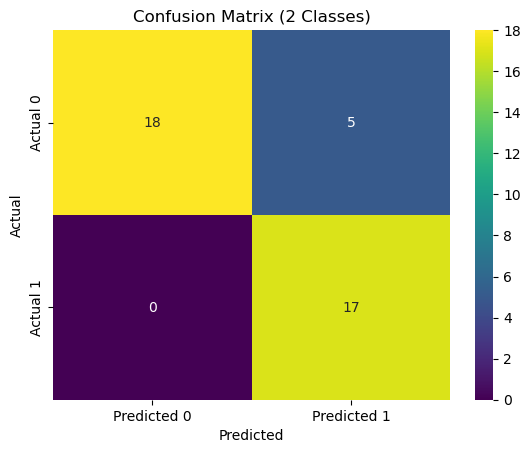

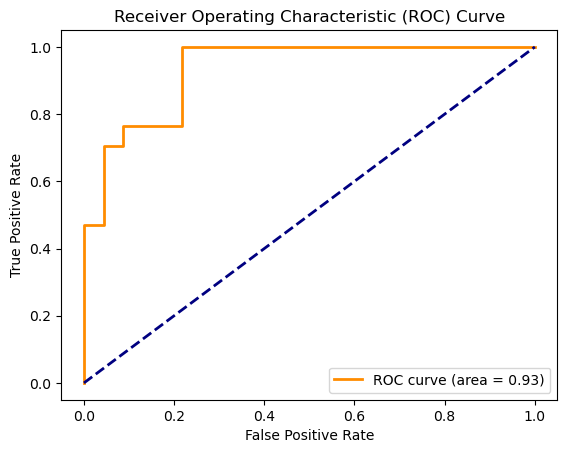

In [25]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

data = pd.read_csv("classification_dataset.csv")

X = data.drop("Target", axis=1)
y = data["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (2 Classes)')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


2. **Завдання для мультикласової класифікації (Multiclass Classification)**:
   - Використовуйте набір даних "multiclass_dataset.csv" для мультикласової класифікації.
   - Розділіть дані на навчальний та тестовий набори.
   - Навчіть класифікатор (наприклад, Random Forest або нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і матриця плутанини.
   - Порівняйте результати різних класифікаторів.

Random Forest Classifier:
Accuracy: 0.78
Precision: 0.79
Recall: 0.78
F1 Score: 0.78


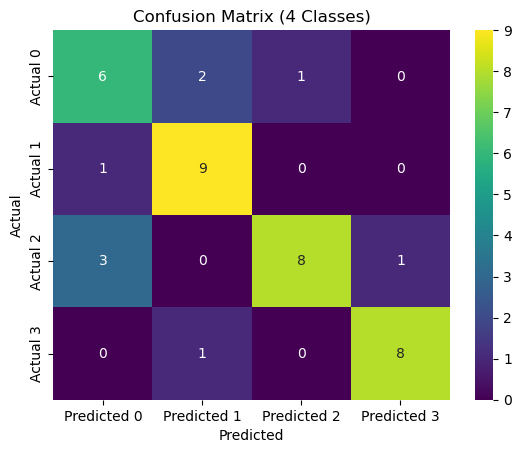

MLP (Multi-Layer Perceptron):
Accuracy: 0.80
Precision: 0.81
Recall: 0.80
F1 Score: 0.80


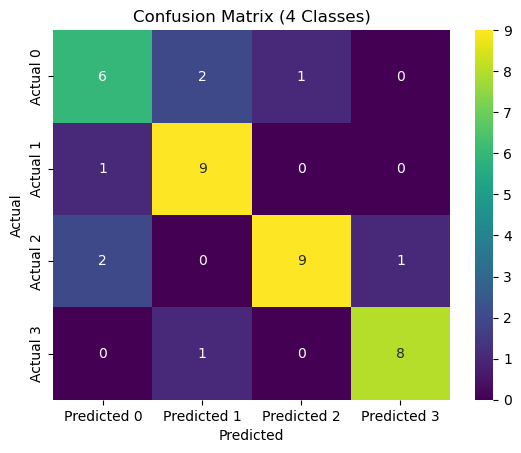

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
import warnings
warnings.simplefilter('ignore')

data = pd.read_csv("multiclass_dataset.csv")

X = data.drop("Target", axis=1)
y = data["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Random Forest Classifier
rfc_model = RandomForestClassifier(random_state=13)
rfc_model.fit(X_train, y_train)

y_pred_rfc = rfc_model.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc, average='weighted')
recall_rfc = recall_score(y_test, y_pred_rfc, average='weighted')
f1_rf = f1_score(y_test, y_pred_rfc, average='weighted')

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rfc:.2f}")
print(f"Precision: {precision_rfc:.2f}")
print(f"Recall: {recall_rfc:.2f}")
print(f"F1 Score: {f1_rf:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=[f'Predicted {i}' for i in range(4)],
            yticklabels=[f'Actual {i}' for i in range(4)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (4 Classes)')
plt.show()

# Multi-Layer Perceptron Classifier
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
confusion_mlp = confusion_matrix(y_test, y_pred_mlp)

print("MLP (Multi-Layer Perceptron):")
print(f"Accuracy: {accuracy_mlp:.2f}")
print(f"Precision: {precision_mlp:.2f}")
print(f"Recall: {recall_mlp:.2f}")
print(f"F1 Score: {f1_mlp:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=[f'Predicted {i}' for i in range(4)],
            yticklabels=[f'Actual {i}' for i in range(4)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (4 Classes)')
plt.show()


3. **Завдання для мультилейбл класифікації (Multilabel Classification)**:
   - Використовуйте набір даних "multilabel_dataset.csv" для мультилейбл класифікації.
   - Розділіть дані на навчальний та тестовий набори.
   - Навчіть класифікатор для прогнозування мультилейблів (наприклад, використовуючи багатошарову нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук і F1-середнє для кожного лейбла.
   - Вивчайте, як класифікатори працюють з різними комбінаціями мультилейбів.

   Feature1  Feature2  Feature3
0       8.0      17.0      16.0
1      11.0      17.0      15.0
2      25.0      15.0      20.0
3       7.0      17.0      29.0
4      15.0      27.0      22.0
   Label1  Label2  Label3  Label4
0       0       1       1       0
1       1       0       0       1
2       0       0       1       1
3       1       1       1       0
4       0       1       1       1

MultiOutputClassifier efficiency evaluation for label 'Label1':
Accuracy: 0.88
Precision: 0.87
Recall: 0.88
F1-score: 0.86


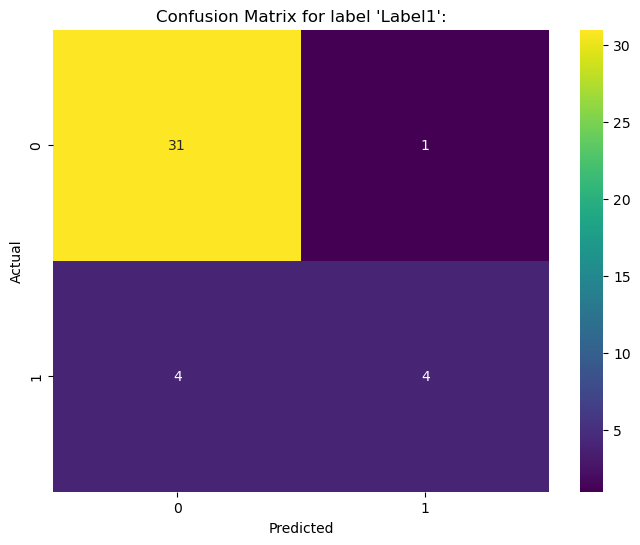


MultiOutputClassifier efficiency evaluation for label 'Label2':
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1-score: 0.87


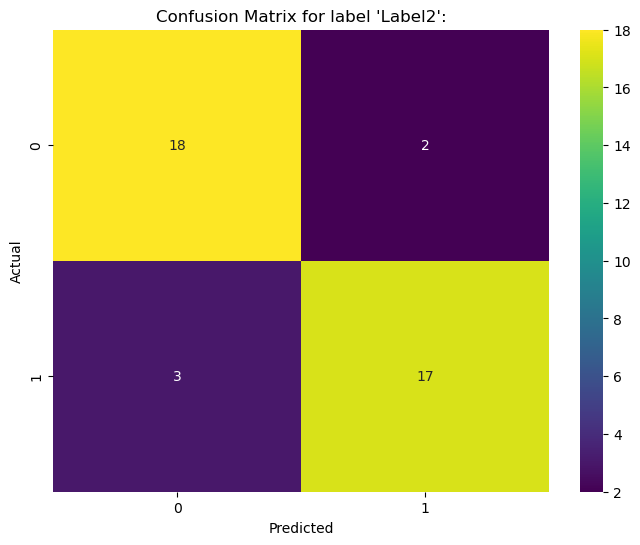


MultiOutputClassifier efficiency evaluation for label 'Label3':
Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1-score: 0.80


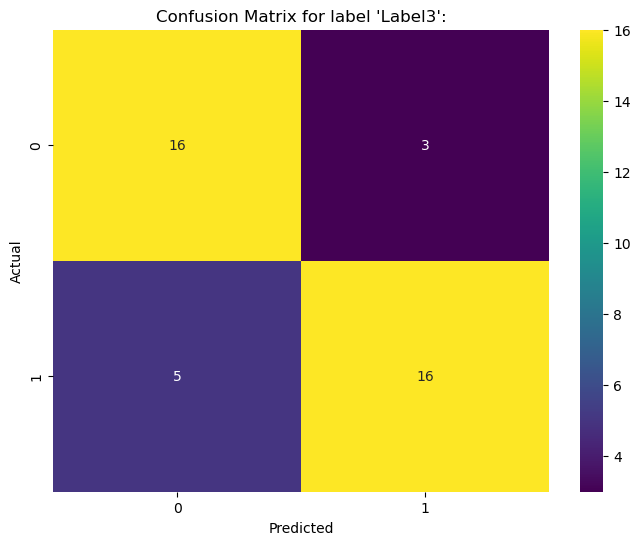


MultiOutputClassifier efficiency evaluation for label 'Label4':
Accuracy: 0.62
Precision: 0.63
Recall: 0.62
F1-score: 0.63


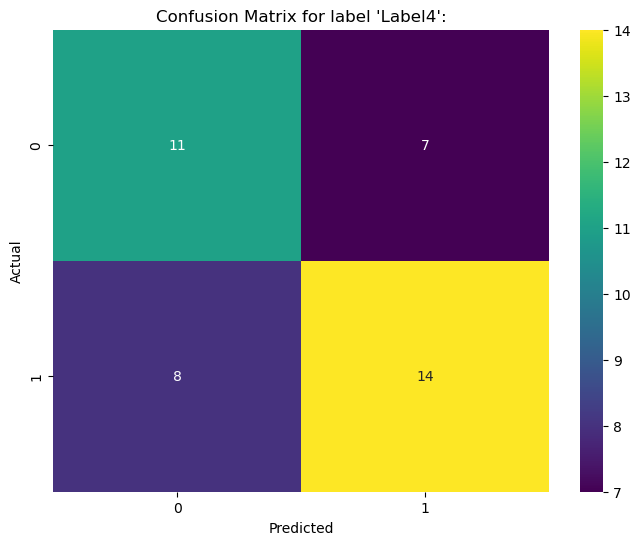

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix

data = pd.read_csv("multilabel_dataset.csv")

X = data.drop([f'Label{i+1}' for i in range(4)], axis=1)
y = data[[f'Label{i+1}' for i in range(4)]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print(X.head())
print(y.head())

mlp_model = MLPClassifier(random_state=10)
mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)

conf_matrix = multilabel_confusion_matrix(y_test, y_pred)

for i in range(y_test.shape[1]):
    label = y_test.columns[i]
    accuracy = accuracy_score(y_test[label], y_pred[:, i])
    precision = precision_score(y_test[label], y_pred[:, i], average='weighted')
    recall = recall_score(y_test[label], y_pred[:, i], average='weighted')
    f1 = f1_score(y_test[label], y_pred[:, i], average='weighted')

    print(f"\nMultiOutputClassifier efficiency evaluation for label '{label}':")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix[i], annot=True, fmt='d', cmap='viridis')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"Confusion Matrix for label '{label}':")
    plt.show()